# 1. scipy.optimize

## Content
- [1.1 Linear Programming](#1.1-Linear-Programming)
  - [Example 1](#Example-1:-Constrained-Production)
  - [Example 2](#Example-2:-Utility-from-Substitutes)
  - [Example 3](#Example-3:-Linear-Sum-Assignment-Problem)
  - [Reference](#Reference)

In [1]:
# !pip install --upgrade scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from scipy.optimize import linprog,linprog_verbose_callback,linear_sum_assignment
from sympy import Matrix

## 1.1 Linear Programming

### Example 1: [Constrained Production](https://www.economicsdiscussion.net/linear-programming/linear-programming-explained-with-diagrams/5844)

Assume that John has total amount of production factors as follows:
<br>
<br>
<center><font face = "Times New Roman"> Table 1: Amounts of Production Factors </font></center>
$$
\begin{array}{|c|c|}
\hline
\text{Factors} & \text{Amounts} \\
\hline\hline
\text{Labor (L)} & 400 (\text{hours}) \\
\hline
\text{Capital (K)} & 300 (\text{machine hours}) \\
\hline
\text{Land (S)} & 200 (\text{square feet}) \\
\hline
\end{array}
$$

He can produce two products, according to the following processes:
<br>
<br>
<center><font face = "Times New Roman"> Table 2: Processes of Production </font></center>

|Factors|Product X|Product Y|
|:-----:|:-------:|:-------:|
| L | 4 | 1 |
| K | 1 | 1 |
| S | 2 | 5 |

where product X can give return of $\$$ 2 while Y give $\$$ 1. Therefore, the problem can be abstracted as follows:

$$
\begin{aligned}
\max_{X,Y} \quad & Z = 2X + Y \\
\text{s.t.} \quad & 4X + Y \leq 400 \\
& X + Y \leq 300 \\
& 2X + 5Y \leq 200
\end{aligned}
$$

In [3]:
# basic setting
# notice that scipy.optimize solves minimization problem

c = [-2,-1]
A = [[4,1],[1,1],[2,5]]
b = [400,300,200]
x_b = (0,None)
y_b = (0,None)

There are three methods for linear programming:
- Two Phase Simplex Method
- Interior Point Method (**by default**)
- Revised Simplex Algorithm (**greater accuracy**)

In [4]:
%timeit linprog(c, A, b, bounds=[x_b, y_b],method = "simplex")

1.5 ms ± 5.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
res_sim = linprog(c, A, b, bounds=[x_b, y_b],method = "simplex")
print(res_sim)

     con: array([], dtype=float64)
     fun: -200.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([  0., 200.,   0.])
  status: 0
 success: True
       x: array([100.,   0.])


In [6]:
%timeit linprog(c, A, b, bounds=[x_b, y_b],method = 'interior-point')

2.54 ms ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
res_int = linprog(c, A, b, bounds=[x_b, y_b],method = 'interior-point')
print(res_int)

     con: array([], dtype=float64)
     fun: -199.9999999996715
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([6.65238531e-10, 2.00000000e+02, 2.95671043e-10])
  status: 0
 success: True
       x: array([1.00000000e+02, 8.21000289e-12])


In [8]:
%timeit linprog(c, A, b, bounds=[x_b, y_b],method = 'revised simplex')
# need to upgrade the scipy package

1.18 ms ± 3.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
res_rev = linprog(c, A, b, bounds=[x_b, y_b],method = 'revised simplex')
print(res_rev)

     con: array([], dtype=float64)
     fun: -200.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([  0., 200.,   0.])
  status: 0
 success: True
       x: array([100.,   0.])


Status 0 means successful! <br>
It seems the last method behaves best in both terms of running time and accuracy. Also, the first method has a higher accuracy than the second which is also the default one.

In [10]:
x_L = np.linspace(0,100,101)
y_L = 400 - 4*x_L
x_K = np.linspace(0,150,151)
y_K = 300 - x_K
x_S = np.linspace(0,100,101)
y_S = 40 - 0.4*x_S
x_obj = np.linspace(0,150,151)
y_obj1 = 100 - 2*x_obj
y_obj2 = 200 - 2*x_obj
y_obj3 = 300 - 2*x_obj
y_obj4 = 400 - 2*x_obj

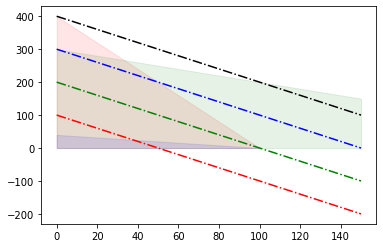

In [11]:
plt.fill_between(x_L,y_L,color="r",alpha = 0.1)
plt.fill_between(x_K,y_K,color="g",alpha = 0.1)
plt.fill_between(x_S,y_S,color="b",alpha = 0.1)
plt.plot(x_obj,y_obj1,"r-.",x_obj,y_obj2,"g-.",x_obj,y_obj3,"b-.",x_obj,y_obj4,"k-.")
plt.show()

We can see that actually the first and the third constraint bind. Then we can try to reduce it to equality constraints to see whether we get a same result.

In [12]:
A_ub = [[1,1]]
b_ub = [300]
A_eq = [[4,1],[2,5]]
b_eq = [400,200]
res_rev = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds=[x_b, y_b],method = 'revised simplex')
print(res_rev)

     con: array([0., 0.])
     fun: -200.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([200.])
  status: 0
 success: True
       x: array([100.,   0.])


Same result!

![jupyter](./Comparison.jpg)

### Example 2: Utility from Substitutes

In order to get unique solution, we artificially impose one more constraint that difference between consumption on X and Y must be greater than some amount, say, 5. Then the UMP is as follows:

$$
\begin{aligned}
\max_{X,Y} \quad & Z = X + Y  \\
\text{s.t.} \quad & 2X + 3Y \leq 40 \\
& X - Y \geq 5 \\
\end{aligned}
$$

In [13]:
c = [-1,-1]
A = [[2,3],[-1,1]]
b = [40,-5]
x_b = (0,None)
y_b = (0,None)

In [14]:
%timeit linprog(c, A, b, bounds=[x_b, y_b],method = "simplex")

1.6 ms ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
res_sim = linprog(c, A, b, bounds=[x_b, y_b],method = "simplex")
print(res_sim)

     con: array([], dtype=float64)
     fun: -20.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0., 15.])
  status: 0
 success: True
       x: array([20.,  0.])


In [16]:
%timeit linprog(c, A, b, bounds=[x_b, y_b],method = "interior-point")

2.4 ms ± 54.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
res_int = linprog(c, A, b, bounds=[x_b, y_b],method = "interior-point")
print(res_int)

     con: array([], dtype=float64)
     fun: -19.999999975883508
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.30874599e-08, 1.49999999e+01])
  status: 0
 success: True
       x: array([2.00000000e+01, 1.51455219e-08])


In [18]:
%timeit linprog(c, A, b, bounds=[x_b, y_b],method = "revised simplex")

1.33 ms ± 64.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
res_rev = linprog(c, A, b, bounds=[x_b, y_b],method = "revised simplex")
print(res_rev)

     con: array([], dtype=float64)
     fun: -20.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0., 15.])
  status: 0
 success: True
       x: array([20.,  0.])


We can also see each iteration of each method.

In [30]:
res_sim = linprog(c, A, b, bounds=[x_b, y_b],method = "simplex",callback = linprog_verbose_callback)
print(res_sim)

--------- Iteration 0  ---------

--------- Iteration 1  ---------

Current Pseudo-Objective Value:
f =  -5.0

Current Solution Vector:
x =  [      5.0000       0.0000]

--------- Simplex Complete --------

Iterations required: 2
Current Pseudo-Objective Value:
f =  -17.0

Current Solution Vector:
x =  [     11.0000       6.0000]

--------- Iteration 2  ---------

Current Objective Value:
f =  -17.0

Current Solution Vector:
x =  [     11.0000       6.0000]

--------- Simplex Complete --------

Iterations required: 3
Current Objective Value:
f =  -20.0

Current Solution Vector:
x =  [     20.0000       0.0000]

     con: array([], dtype=float64)
     fun: -20.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0., 15.])
  status: 0
 success: True
       x: array([20.,  0.])


In [31]:
res_int = linprog(c, A, b, bounds=[x_b, y_b],method = "interior-point",callback = linprog_verbose_callback)
print(res_int)

--------- Iteration 0  ---------

--------- Iteration 1  ---------

Current Pseudo-Objective Value:
f =  -7.741922615729104

Current Solution Vector:
x =  [      5.6940       2.0479]

--------- Iteration 2  ---------

Current Pseudo-Objective Value:
f =  -15.451214252962156

Current Solution Vector:
x =  [     11.9117       3.5395]

--------- Iteration 3  ---------

Current Pseudo-Objective Value:
f =  -19.312022823150244

Current Solution Vector:
x =  [     19.3117       0.0003]

--------- Iteration 4  ---------

Current Pseudo-Objective Value:
f =  -19.999517701876485

Current Solution Vector:
x =  [     19.9992       0.0003]

--------- Iteration 5  ---------

Current Pseudo-Objective Value:
f =  -19.999999975883508

Current Solution Vector:
x =  [     20.0000       0.0000]

     con: array([], dtype=float64)
     fun: -19.999999975883508
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.30874599e-08, 1.49999999e+01])
  status: 0
 success: True
       x

In [32]:
res_rev = linprog(c, A, b, bounds=[x_b, y_b],method = "revised simplex",callback = linprog_verbose_callback)
print(res_rev)

--------- Iteration 0  ---------

--------- Iteration 1  ---------

Current Pseudo-Objective Value:
f =  -5.0

Current Solution Vector:
x =  [      5.0000       0.0000]

--------- Iteration 1  ---------

Current Objective Value:
f =  -5.0

Current Solution Vector:
x =  [      5.0000       0.0000]

--------- Iteration 2  ---------

Current Objective Value:
f =  -17.0

Current Solution Vector:
x =  [     11.0000       6.0000]

--------- Iteration 3  ---------

Current Objective Value:
f =  -20.0

Current Solution Vector:
x =  [     20.0000       0.0000]

     con: array([], dtype=float64)
     fun: -20.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0., 15.])
  status: 0
 success: True
       x: array([20.,  0.])


Same result of comparisons between methods in terms of running time and accuracy!

In [23]:
x_p = np.linspace(0,20,21)
y_p = (40 - 2*x_p)/3
x_d = np.linspace(0,20,21)
y_d = x_d - 5
y_1 = -5*np.ones(y_d.shape)
x_obj = np.linspace(0,20,21)
y_obj1 = 16 - x_obj
y_obj2 = 18 - x_obj
y_obj3 = 20 - x_obj
y_obj4 = 22 - x_obj
y_obj5 = 24 - x_obj

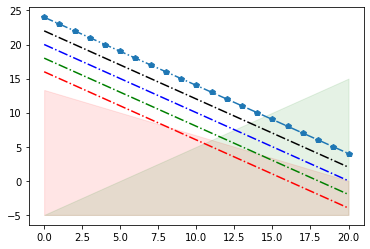

In [24]:
plt.fill_between(x_p,y_p,y_1,color="r",alpha = 0.1)
plt.fill_between(x_d,y_d,y_1,color="g",alpha = 0.1)
plt.plot(x_obj,y_obj1,"r-.",x_obj,y_obj2,"g-.",x_obj,y_obj3,"b-.",x_obj,y_obj4,"k-.",x_obj,y_obj5,"p-.")
plt.show()

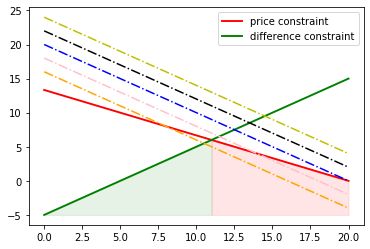

In [25]:
plt.plot(x_p,y_p,"r",x_d,y_d,"g",linewidth=1.9)
plt.legend(["price constraint","difference constraint"])

plt.fill_between(x_p,y_p,y_1,where=y_p<=y_d,color="r",alpha = 0.1)
plt.fill_between(x_d,y_d,y_1,where=y_d<=y_p,color="g",alpha = 0.1)

plt.plot(x_obj,y_obj1,color="orange",linestyle="-.")
plt.plot(x_obj,y_obj2,color="pink",linestyle="-.")
plt.plot(x_obj,y_obj3,"b-.",x_obj,y_obj4,"k-.",x_obj,y_obj5,"y-.")
plt.show()

### Example 3: [Linear Sum Assignment Problem](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html#scipy.optimize.linear_sum_assignment)

scipy.optimize provides a solver to a type of interesting problem called linear sum assignment problem. The problem goes as this: we have costs to assign a worker to a job, and we want to minimize the total costs of assignment, i.e.,

$$
\begin{aligned}
\min \quad \sum_{i}\sum_{j} C_{i,j}X_{i,j}
\end{aligned}
$$

where $X_{i,j}=1$ if worker i is assigned to job j and $C$ is the assignment costs matrix.

In [26]:
cost = np.array([[2,5,2,7], [4,2,6,8], [2,5,9,0],[8,0,2,6]])
# not necessary to be square
row_ind, col_ind = linear_sum_assignment(cost,maximize=True)
print(row_ind)
print(col_ind)
# corresponding row and column indices of optimal assignment

[0 1 2 3]
[1 3 2 0]


In [27]:
cost[row_ind,col_ind].sum()
# minimized costs

30

In [28]:
np.arange(cost.shape[0])
# row indices are sorted

array([0, 1, 2, 3])

In [29]:
x = np.zeros(cost.shape)
x[row_ind,col_ind] = 1
Matrix(x)

Matrix([
[0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 1.0],
[0.0, 0.0, 1.0, 0.0],
[1.0, 0.0, 0.0, 0.0]])

Details of parameters and output of this function can be refered to [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html#scipy.optimize.linear_sum_assignment)

![jupyter](./linear_sum_assignment.jpg)

## Reference
[1] *scipy.optimize document*: https://docs.scipy.org/doc/scipy/reference/optimize.html
<br>
[2] *Linear Programming (Explained With Diagrams)*: https://www.economicsdiscussion.net/linear-programming/linear-programming-explained-with-diagrams/5844